## EDA


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [47]:
train = pd.read_csv('adult_train.csv')
train.head()

,age,workclass,Unnamed: 2,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [41]:
train.nunique()

age                  73
workclass             9
Unnamed: 2        21648
education            16
education-num        16
marital-status        7
occupation           15
relationship          6
race                  5
sex                   2
capital-gain        119
capital-loss         92
hours-per-week       94
native-country       42
Income                2
dtype: int64

Income will be 0 if it's less than or equal to 50K else it will be 1

In [48]:
train['Income'] = train['Income'].map(lambda x: 1 if x == ' >50K' else 0)

In [20]:
train.head()

,age,workclass,Unnamed: 2,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [54]:
num_cols = train.columns[train.dtypes != 'object']
cat_cols = train.columns[train.dtypes == 'object']
print(num_cols, cat_cols)

Index(['age', 'Unnamed: 2', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'Income'],
      dtype='object') Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country'],
      dtype='object')


Numerical Columns


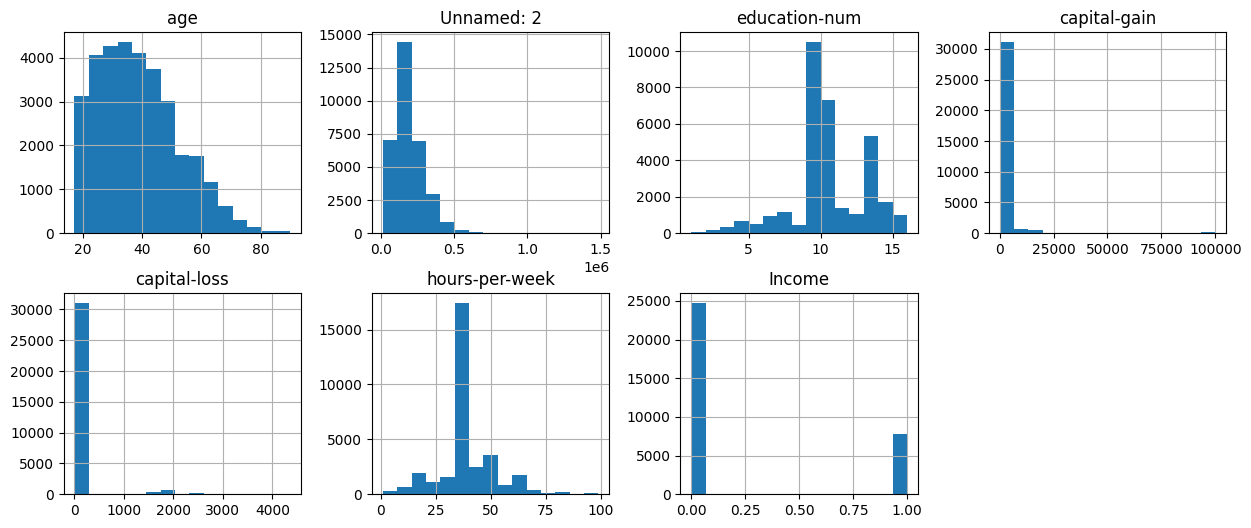

In [26]:
train[num_cols].hist(bins=15, figsize=(15, 6), layout=(2, 4));

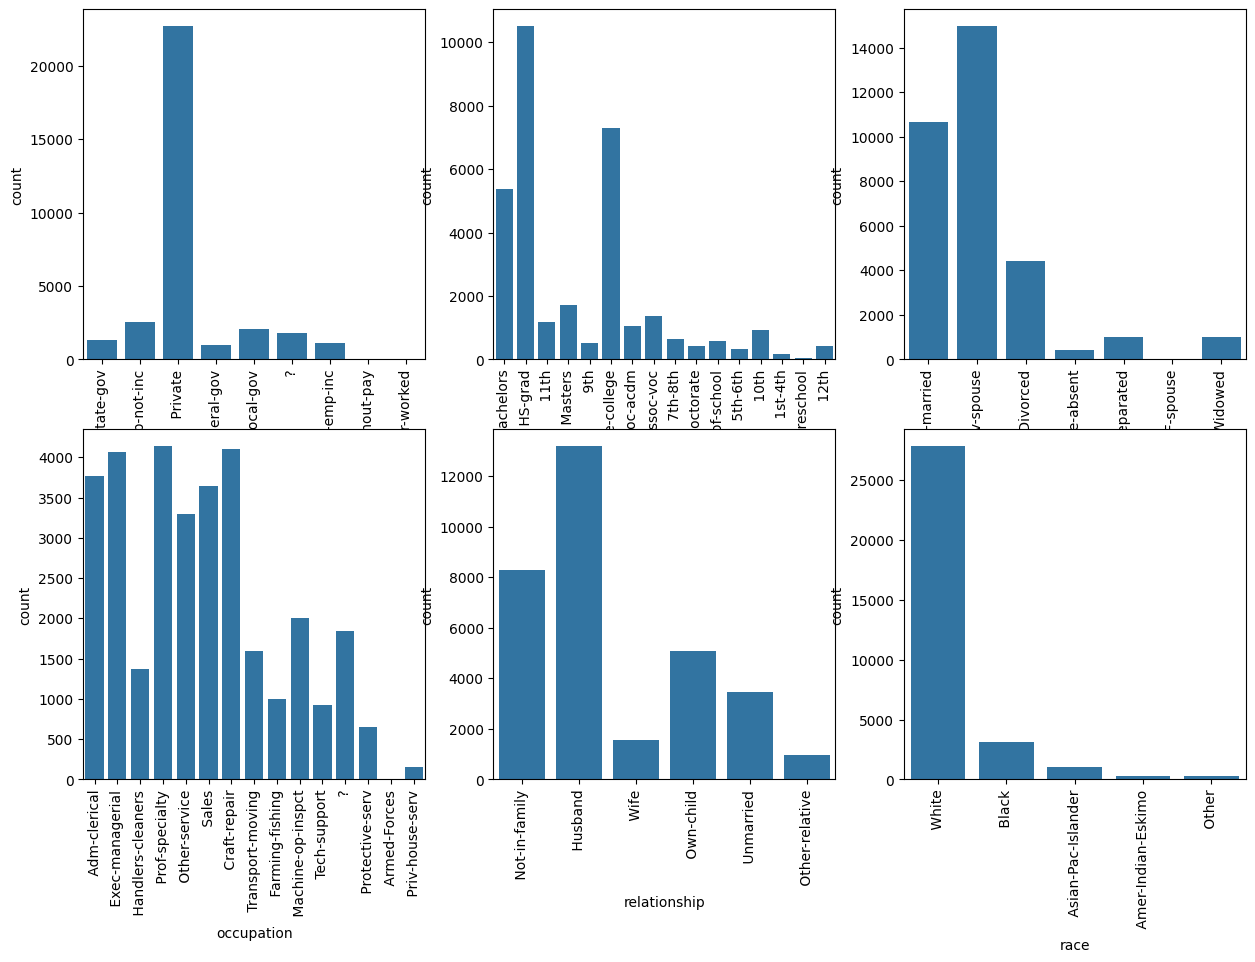

In [28]:
fig , ax = plt.subplots(2, 3, figsize=(15, 10))
for cat, subplot in zip(cat_cols, ax.flatten()):
    sns.countplot(x=cat, data=train, ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

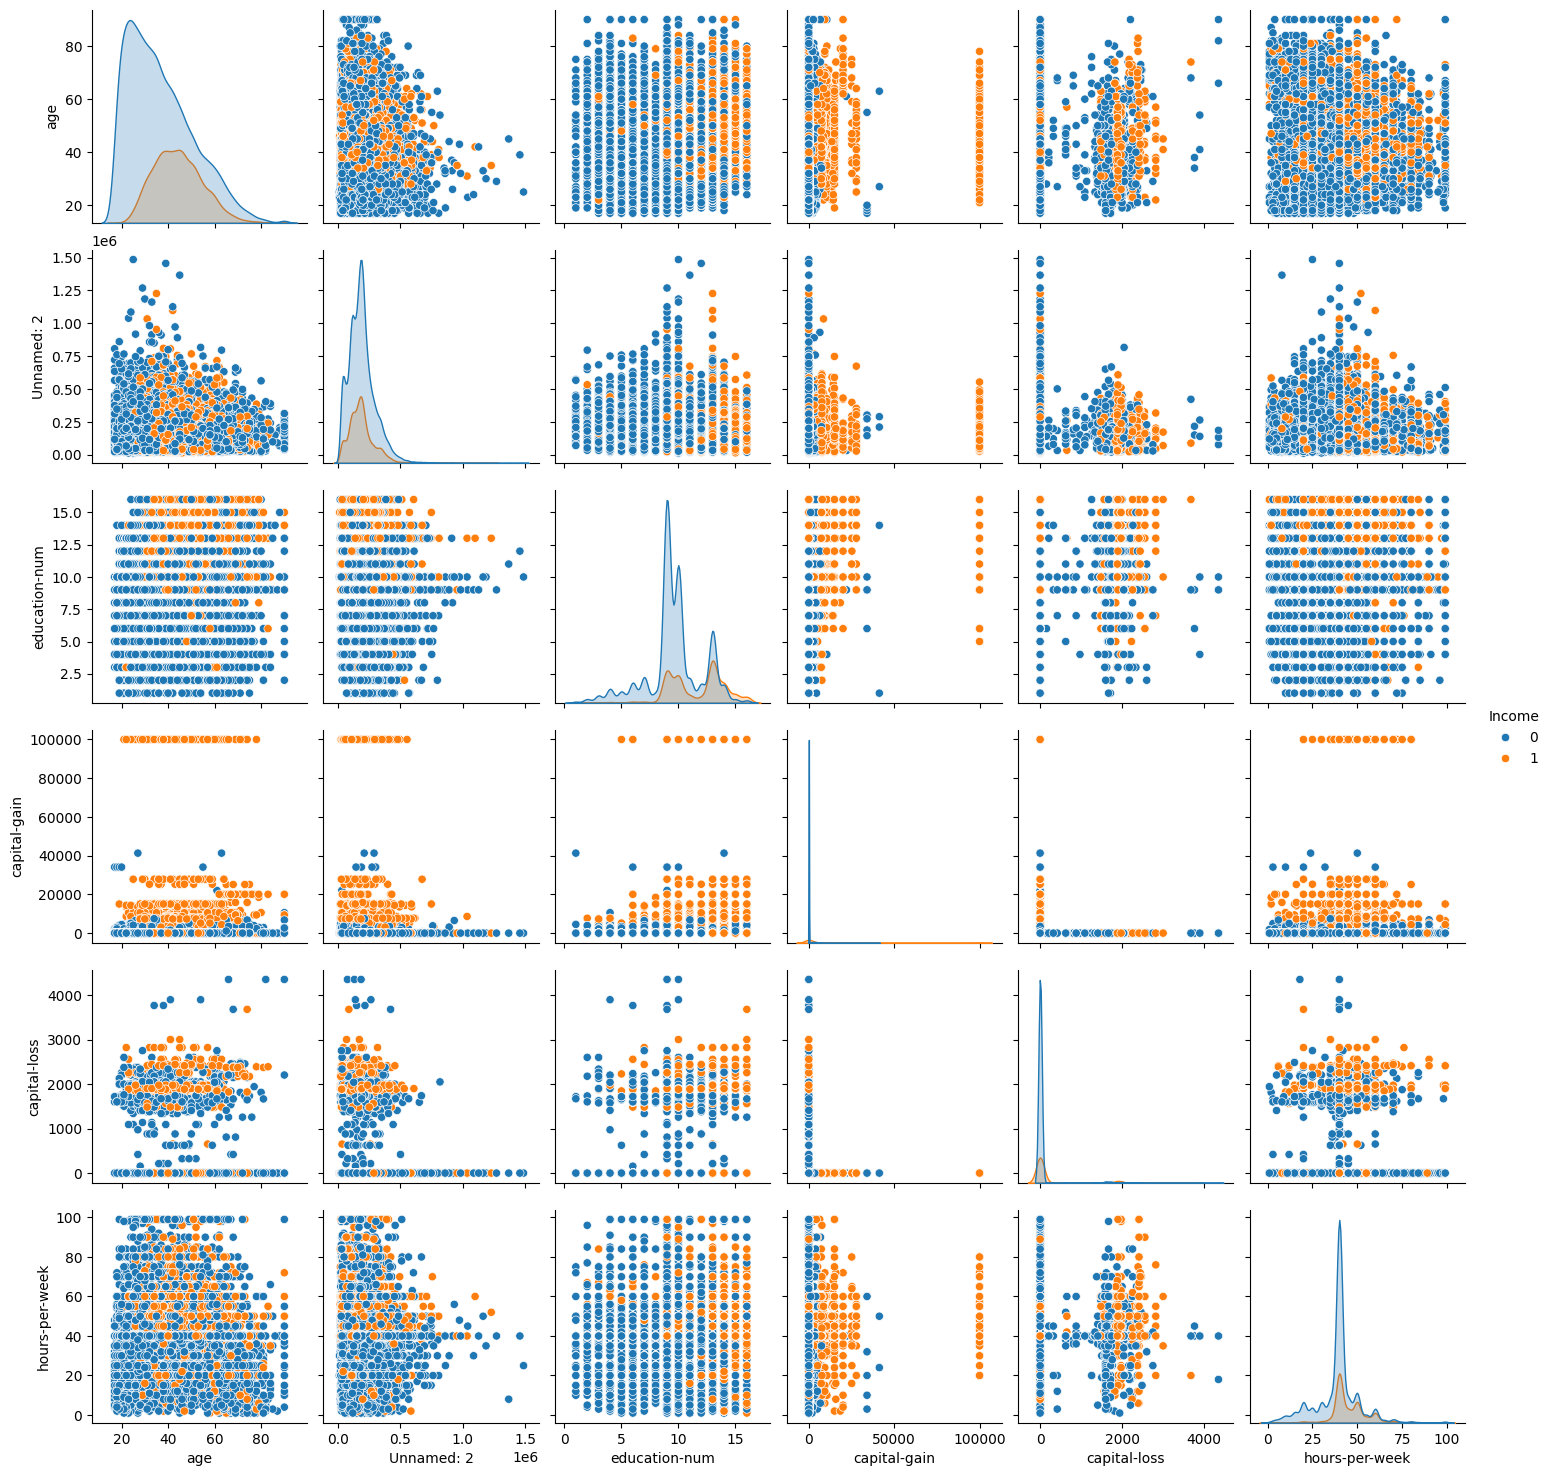

In [29]:
sns.pairplot(train[num_cols], hue='Income');

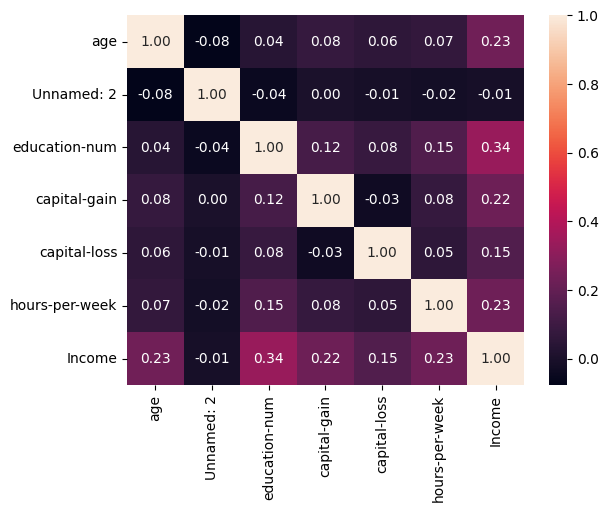

In [30]:
sns.heatmap(train[num_cols].corr(), annot=True, fmt='.2f');

## Preprocessing


In [4]:
train = pd.read_csv('adult_train.csv')

In [5]:
train['Income'] = train['Income'].map(lambda x: 1.0 if x == ' >50K' else 0.0)
y = train['Income']
X = train.drop(['Income'], axis=1)


In [6]:
num_cols = X.columns[X.dtypes != 'object']
cat_cols = X.columns[X.dtypes == 'object']

In [7]:
print(X.columns)
num_cols

Index(['age', 'workclass', 'Unnamed: 2', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')


Index(['age', 'Unnamed: 2', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

In [8]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
    ('num_imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('cat_imputer', SimpleImputer(strategy='most_frequent')),
    ('oneHot', OneHotEncoder(sparse_output=False))
])

preprocessing_pipeline = ColumnTransformer([
    ('num_pipeline', num_pipeline, num_cols),
    ('cat_pipeline', cat_pipeline, cat_cols)
])

In [9]:
X_processed = preprocessing_pipeline.fit_transform(X)

In [10]:
X_processed = np.array(X_processed)
y = np.array(y)

In [11]:
X_processed[0]

array([ 0.03067056, -1.06361075,  1.13473876,  0.1484529 , -0.21665953,
       -0.03542945,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        1.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        1.        ,  0.        ,  0.        ,  0.        ,  0.  

In [12]:
X_processed
y

array([0., 0., 0., ..., 0., 0., 1.])

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.15, random_state=69)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(27676, 108) (4885, 108) (27676,) (4885,)


## Model Training

In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    confmat = confusion_matrix(y_true, y_pred)
    confmat = pd.DataFrame(confmat)
    return (accuracy, f1, confmat)

### SVM Classifier

In [20]:
X_train.dtype

dtype('float64')

In [21]:
from sklearn.svm import SVC

svm_clf = SVC(kernel='rbf')
svm_clf.fit(X_train, y_train)
pred_train = svm_clf.predict(X_train)
pred_test = svm_clf.predict(X_test)

Accuracy score for SVM :  0.8567041965199591
F1 score for SVM :  0.6637848222862632
Confusion matrix for SVM : 


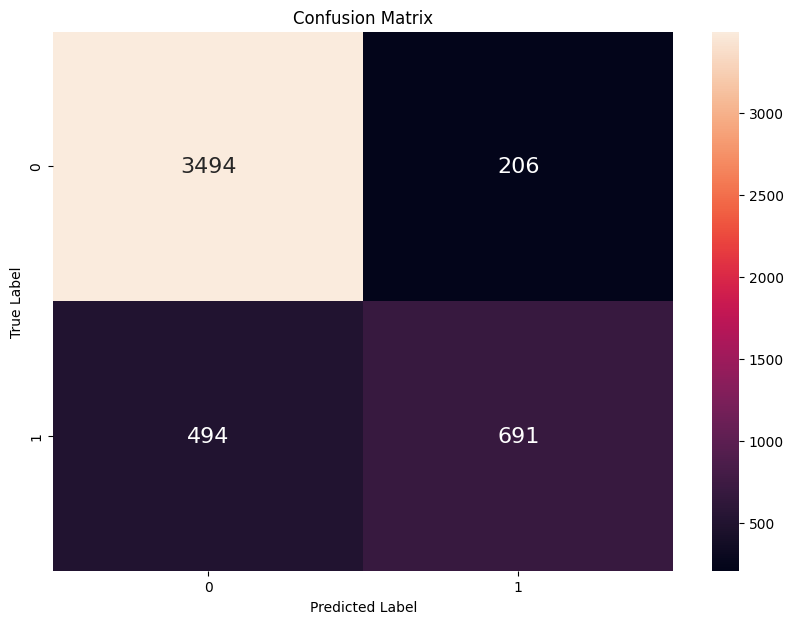

In [22]:
accuracy, f1, confmat = evaluate_model(y_test, pred_test)
print("Accuracy score for SVM : ",  accuracy)
print("F1 score for SVM : ", f1)
print("Confusion matrix for SVM : ")
fig = plt.figure(figsize=(10, 7))  
sns.heatmap(confmat, annot=True, annot_kws={"size": 16}, fmt="g")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### MLP

In [23]:
from sklearn.neural_network import MLPClassifier

hidden_layer = [5,7,9,7,5,3]
mlp_clf = MLPClassifier(hidden_layer_sizes=hidden_layer, activation='relu', solver='adam', max_iter=400)
mlp_clf.fit(X_train, y_train)
pred_train_mlp = mlp_clf.predict(X_train)
pred_test_mlp = mlp_clf.predict(X_test)

Accuracy score for MLP :  0.852200614124872
F1 score for MLP :  0.6718181818181819
Confusion matrix for MLP : 


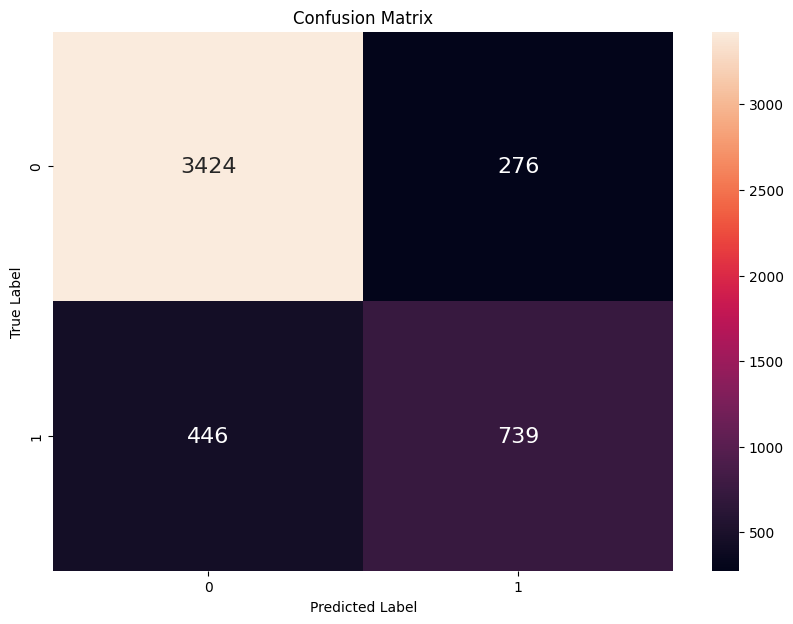

In [24]:
accuracy, f1, confmat = evaluate_model(y_test, pred_test_mlp)
print("Accuracy score for MLP : ",  accuracy)
print("F1 score for MLP : ", f1)
print("Confusion matrix for MLP : ")
fig = plt.figure(figsize=(10, 7))  
sns.heatmap(confmat, annot=True, annot_kws={"size": 16}, fmt="g")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()